In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [ ]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.shape

(400, 26)

In [ ]:
data.drop('id', axis = 1, inplace = True)

In [ ]:
data.columns = ['age',
                'blood_pressure',
                'specific_gravity',
                'albumin',
                'sugar',
                'red_blood_cells',
                'pus_cell',
                'pus_cell_clumps',
                'bacteria',
                'blood_glucose_random',
                'blood_urea',
                'serum_creatinine',
                'sodium',
                'potassium',
                'haemoglobin',
                'packed_cell_volume',
                'white_blood_cell_count',
                'red_blood_cell_count',
                'hypertension',
                'diabetes_mellitus',
                'coronary_artery_disease',
                'appetite',
                'peda_edema',
                'aanemia',
                'class'
               ]

In [ ]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
data.isnull().any()


age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
peda_edema                  True
aanemia                     True
class                      False
dtype: bool

In [ ]:
data['packed_cell_volume']     = pd.to_numeric(data['packed_cell_volume']    , errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count']   = pd.to_numeric(data['red_blood_cell_count']  , errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
data.isnull().any() 


age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
peda_edema                  True
aanemia                     True
class                      False
dtype: bool

In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True) 
data['haemoglobin'].fillna(data['haemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode()[0],inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode()[0],inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data.median())

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

In [ ]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True) 
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data["bacteria"].mode()[0],inplace=True)
data['aanemia'].fillna(data['aanemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetes_mellitus'].fillna(data['diabetes_mellitus'].mode()[0],inplace=True)
data['peda_edema'].fillna(data['peda_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)


In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'aanemia', 'packed_cell_volume', 'red_blood_cell_count', 'appetite', 'pus_cell_clumps', 'class', 'pus_cell', 'white_blood_cell_count', 'diabetes_mellitus', 'peda_edema', 'bacteria', 'red_blood_cells', 'hypertension', 'coronary_artery_disease'}


In [ ]:
for i in catcols:
    print("colums :",i)
    c=data[i]
    print(c)
    print('*'*120+'\n')

colums : aanemia
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: aanemia, Length: 400, dtype: int64
************************************************************************************************************************

colums : peda_edema
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: peda_edema, Length: 400, dtype: int64
************************************************************************************************************************

colums : appetite
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: appetite, Length: 400, dtype: int64
************************************************************************************************************************

colums : bacteria
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: bacteria, Length: 400, dtype: in

In [ ]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
#catcols.remove('white_blood_cell_count')
print(catcols)

ValueError: ignored

In [ ]:
catcols=['aanemia','peda_edema','appetite','bacteria','class','coronary_artery_disease','diabetes_mellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  c=data[i]
  print(c)
  data[i]=LEi.fit_transform(data[i])
  c=data[i]
  print(c)
  print("*"*100)


LABEL ENCODING OF: aanemia
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: aanemia, Length: 400, dtype: int64
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: aanemia, Length: 400, dtype: int64
****************************************************************************************************
LABEL ENCODING OF: peda_edema
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: peda_edema, Length: 400, dtype: int64
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: peda_edema, Length: 400, dtype: int64
****************************************************************************************************
LABEL ENCODING OF: appetite
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: appetite, Length: 400, dtype: int64
0     

In [ ]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'packed_cell_volume', 'appetite', 'peda_edema', 'red_blood_cell_count', 'pus_cell_clumps', 'pus_cell', 'diabetes_mellitus', 'bacteria', 'albumin', 'blood_urea', 'blood_glucose_random', 'specific_gravity', 'potassium', 'haemoglobin', 'class', 'white_blood_cell_count', 'serum_creatinine', 'sodium', 'blood_pressure', 'aanemia', 'age', 'sugar', 'red_blood_cells', 'hypertension', 'coronary_artery_disease'}


In [ ]:
for i in contcols:
  print("Continous Columns :",i)
  c=data[i]
  print(c)
  print('*'*120+'\n')

Continous Columns : packed_cell_volume
0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object
************************************************************************************************************************

Continous Columns : appetite
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: appetite, Length: 400, dtype: int64
************************************************************************************************************************

Continous Columns : peda_edema
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: peda_edema, Length: 400, dtype: int64
************************************************************************************************************************

Continous Columns : red_blood_cell_count
0      5.2
1      5.2
2      5.2
3      3.9
4  

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'packed_cell_volume', 'appetite', 'peda_edema', 'red_blood_cell_count', 'pus_cell_clumps', 'pus_cell', 'diabetes_mellitus', 'bacteria', 'blood_urea', 'blood_glucose_random', 'potassium', 'haemoglobin', 'class', 'white_blood_cell_count', 'serum_creatinine', 'sodium', 'blood_pressure', 'aanemia', 'age', 'red_blood_cells', 'hypertension', 'coronary_artery_disease'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(catcols)

['aanemia', 'peda_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [ ]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)


AttributeError: ignored

In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])


TypeError: ignored

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'\tyes':'yes','yes':})
c(data['diabetesmellitus'])


SyntaxError: ignored

In [ ]:
data.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<Axes: xlabel='age', ylabel='Density'>

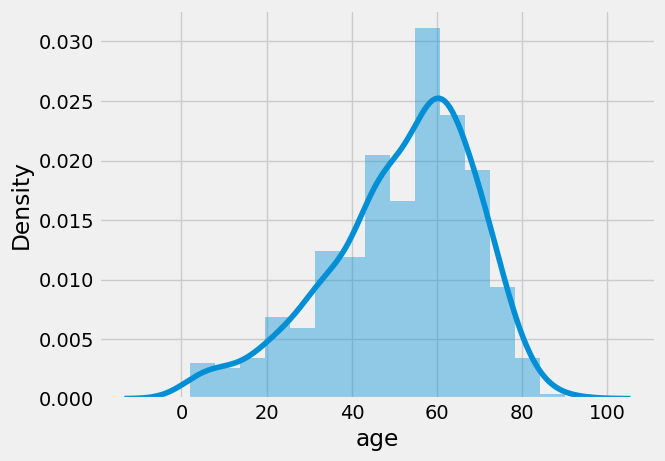

In [ ]:
sns.distplot(data.age)


Text(0.5, 1.0, 'age vs blood scatter plot')

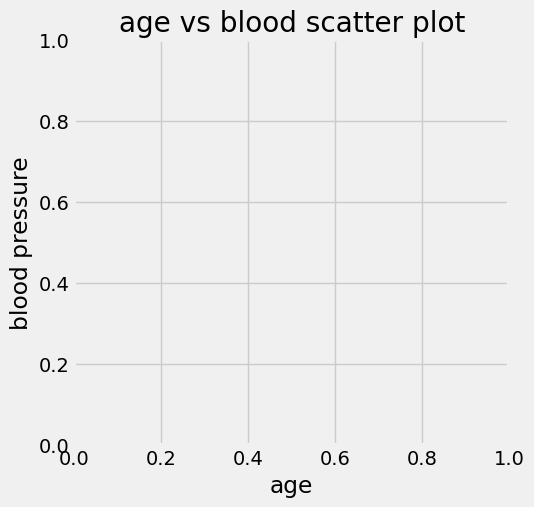

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age vs blood scatter plot")



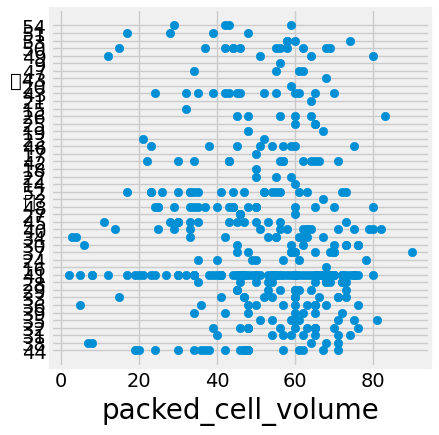

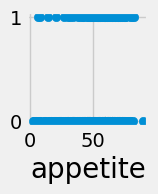

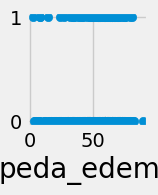

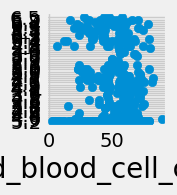

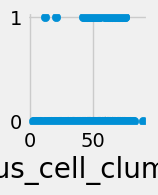

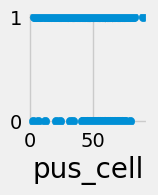

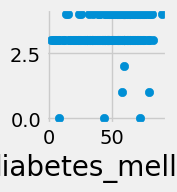

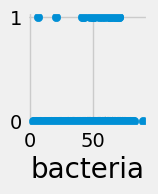

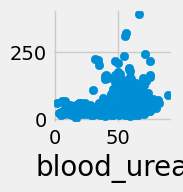

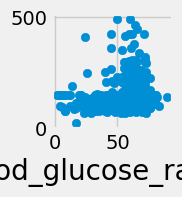

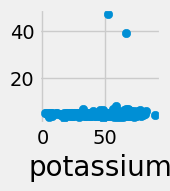

In [ ]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

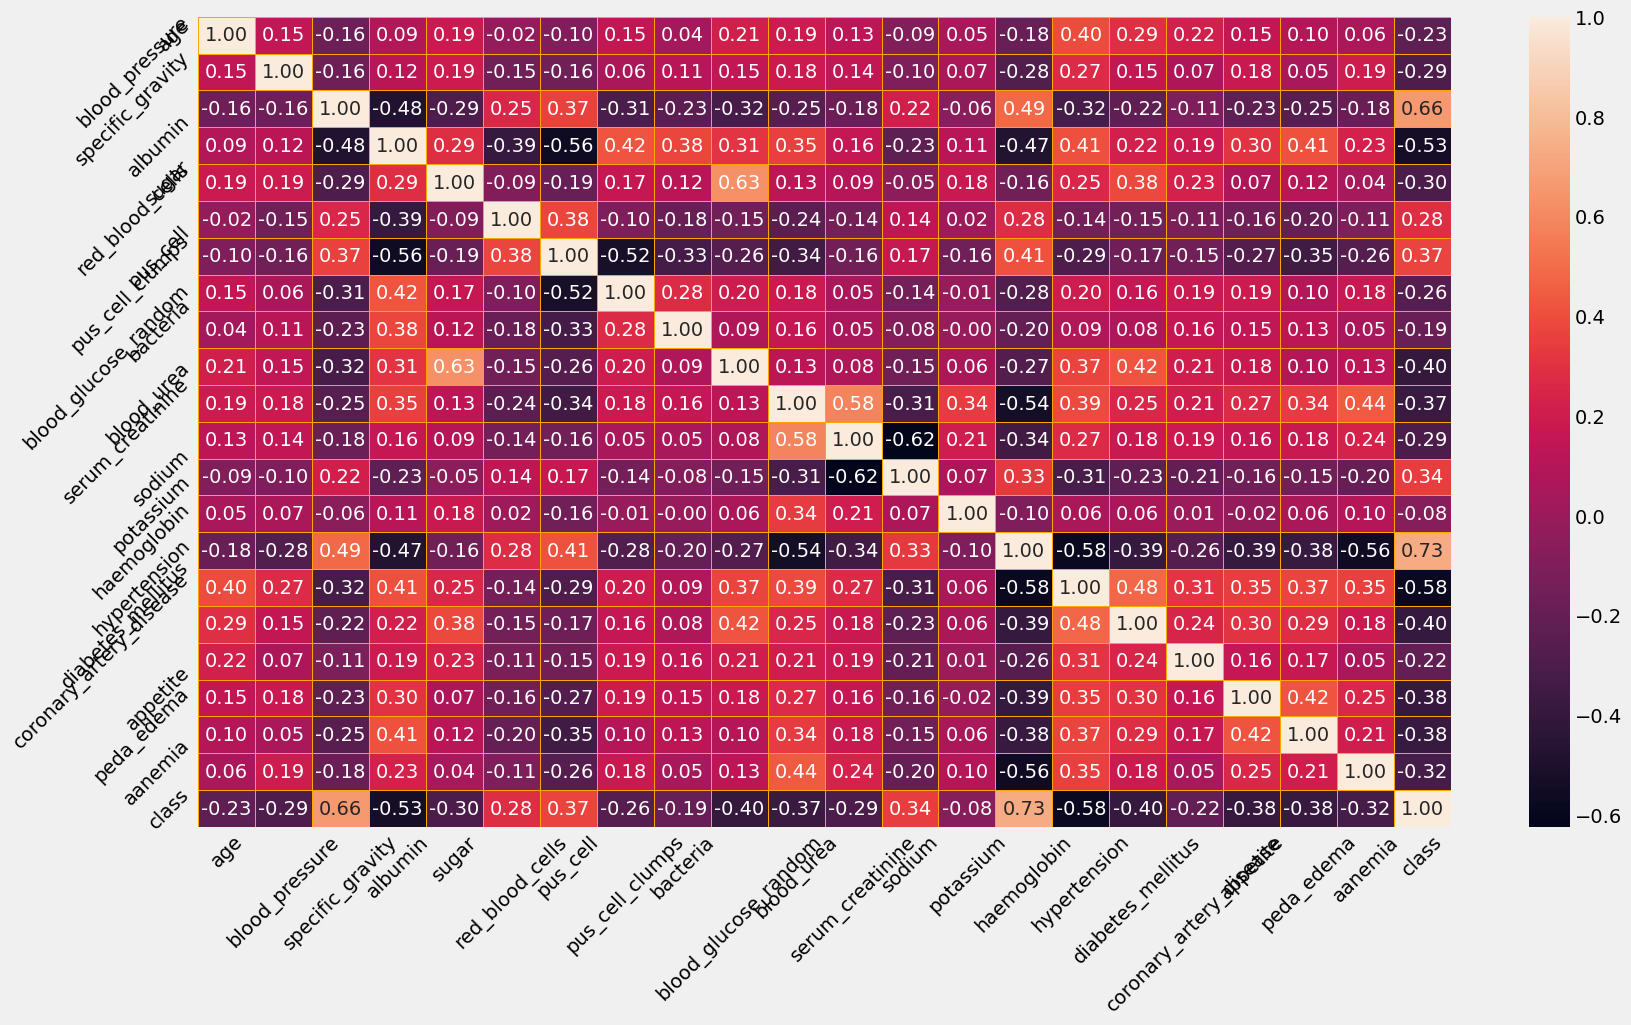

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor='orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

<Axes: ylabel='count'>

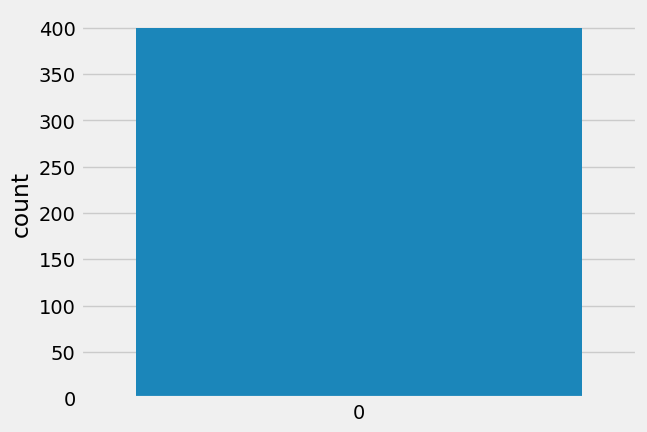

In [ ]:
sns.countplot(data['class'])


In [ ]:
setcols=['red_blood_cells','pus_cell','blood_glucose_random','blood_urea','peda_edema','aanemia','diabetes_mellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)


(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
# Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [ ]:
# Creating ANN skleton view
classification = Sequential()
classification.add(Dense (30, activation='relu')) 
classification.add (Dense (128, activation='relu'))
classification.add(Dense (64, activation='relu'))
classification.add(Dense (32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))


In [ ]:
#compiling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#Training the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=20)


Epoch 1/20
26/26 [==============================] - 2s 14ms/step - loss: 1.0661 - accuracy: 0.2969 - val_loss: 0.4300 - val_accuracy: 0.2188
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.2188 - val_loss: 0.3654 - val_accuracy: 0.3281
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.2891 - val_loss: 0.4497 - val_accuracy: 0.3125
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.5405 - accuracy: 0.2422 - val_loss: 0.4570 - val_accuracy: 0.3594
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.5678 - accuracy: 0.2812 - val_loss: 0.4777 - val_accuracy: 0.5156
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.2539 - val_loss: 0.3771 - val_accuracy: 0.2344
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.2773 - val_loss: 0.5877 - val_accuracy: 0.1719
Epoch 8/20
26/26 [=

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = rfc.predict(x_test)


In [ ]:
y_predict_train = rfc.predict(x_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')


In [ ]:
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict=dtc.predict(x_test)
y_predict


array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [ ]:
y_predict_train = dtc.predict(x_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_predict=lgr.predict(x_test)

In [ ]:
#logistic Regression
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [ ]:
#DecisionTree classifier
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [ ]:
#Random Forest Classifier
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [ ]:
classification.save("ckd.h5")

In [ ]:
#Testing the model
y_pred=classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([[4.42259490e-01],
       [9.41924512e-01],
       [1.25132006e-04],
       [9.83340919e-01],
       [9.95558441e-01],
       [1.84544176e-01],
       [4.17563890e-04],
       [7.10817724e-02],
       [9.78671789e-01],
       [6.67405665e-01],
       [7.50400897e-09],
       [9.71240878e-01],
       [8.18222523e-01],
       [9.81005251e-01],
       [4.52461570e-08],
       [1.15486961e-04],
       [1.43693477e-12],
       [9.93869841e-01],
       [9.82872963e-01],
       [5.60894376e-04],
       [9.94668424e-01],
       [9.90252018e-01],
       [4.83014705e-11],
       [9.91747618e-01],
       [1.19425100e-03],
       [9.64217067e-01],
       [1.91315007e-06],
       [3.36502194e-02],
       [9.94314492e-01],
       [9.02261794e-01],
       [8.19166422e-01],
       [9.89267588e-01],
       [9.41784859e-01],
       [7.76941955e-01],
       [3.06742179e-04],
       [3.40693630e-02],
       [9.94303703e-01],
       [3.06438431e-02],
       [9.81999278e-01],
       [9.94920075e-01],


In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [ ]:
def predict_exit(sample_value):
  #convert list to numpy array
  sample_value=np.array(sample_value)
  #Reshape because sample_value contains only 1 record
  sample_value=sample_value.reshape(1,-1)
  #Feature scaling
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)
  

In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('prediction:High chance of CKD!')
else:
    print('prediction:Low chance of CKD.')

1/1 [==============================] - 0s 99ms/step
prediction:Low chance of CKD.


In [ ]:
from sklearn import model_selection

In [ ]:
    dfs = [] 
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()), 
          ('DecisionTree', DecisionTreeClassifier()),
         ]
results=[]
    names = [] 
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names=['NO CKD', 'CKD']  
    for name, model in models: 
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210) 
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold,scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(classification_report(y_test,y_pred,target_names=target_names))
        results.append(cv_results)
        names.append(name) 
        this_df = pd.DataFrame(cv_results) 
        this_df['model']=name 
        dfs.append(this_df)  
final = pd.concat(dfs, ignore_index-True)
return final

LogReg


ValueError: ignored

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm


array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

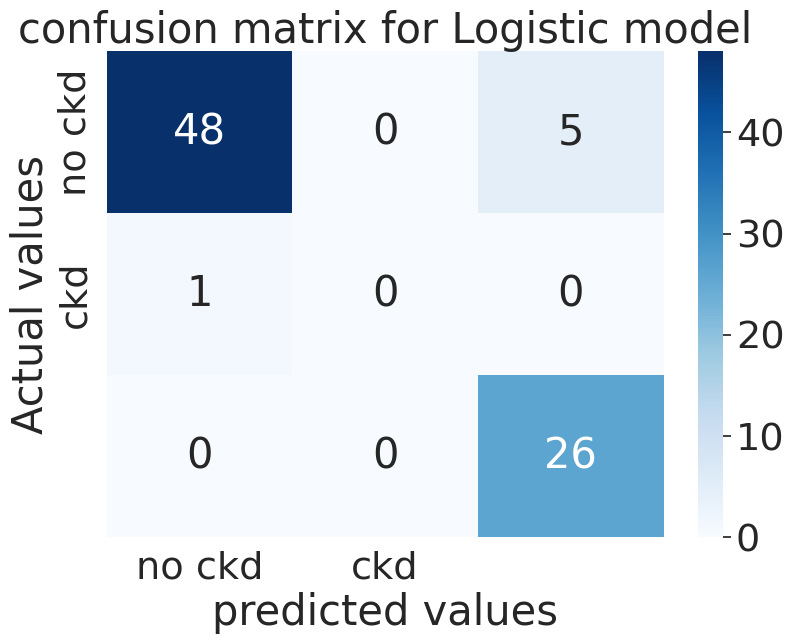

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for Logistic model')
plt.show()


In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm


array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

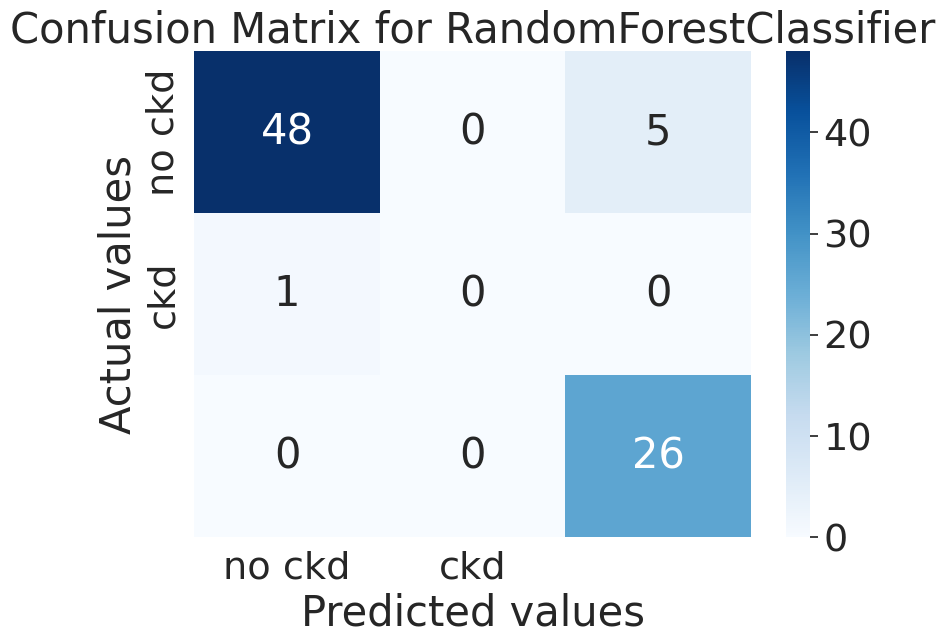

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

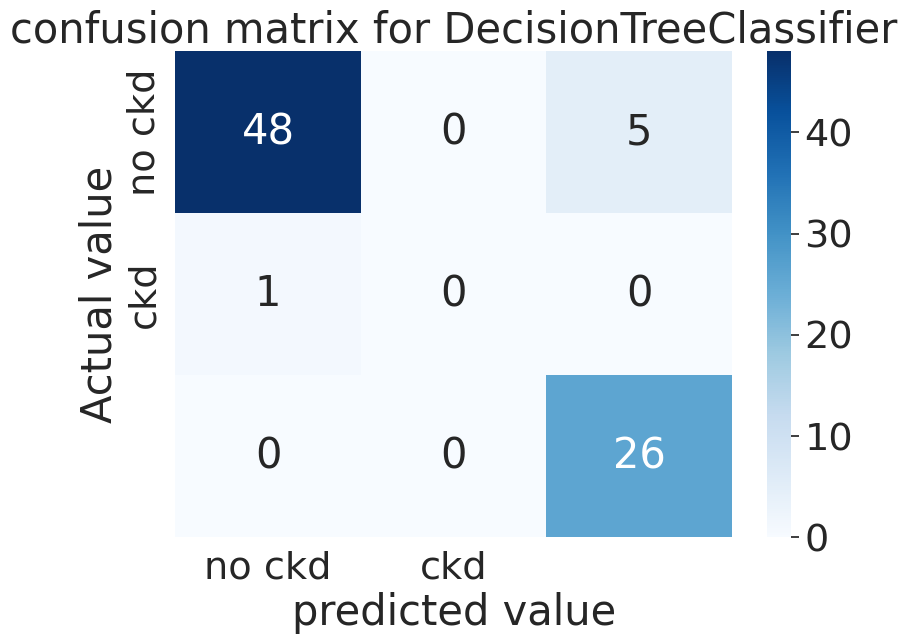

In [ ]:
#Plotting confusion matrix 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm,cmap='Blues' , annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted value')
plt.ylabel('Actual value')
plt.title('confusion matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.00      0.00      0.00         1
           2       0.84      1.00      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.64      0.62        80
weighted avg       0.92      0.93      0.92        80



In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

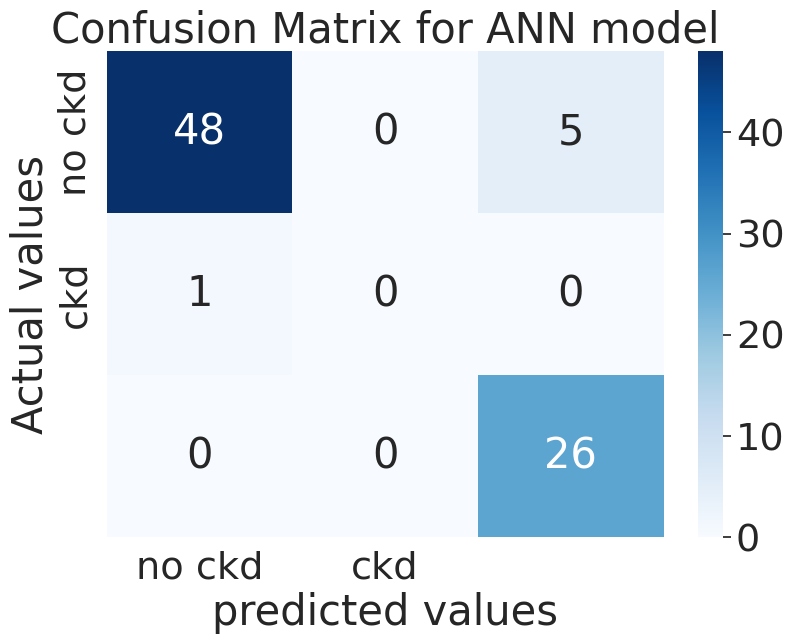

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df=final.loc[final.model==model]
    bootstrap=model_df.sample(n=30,replace=True)
    bootstraps.append(bootstrap)

bootstrap_df=pd.concat(bootstraps,ignore_index=True)
result_long=pd.melt(bootstraps_df,id_vars=['model'],var_name='metrics',value_name='value')
time_matrics=['fit_time','score_time']#fit time matrics
## PERFORMANCE METRICS
result_long_nofit=result_long.loc[result_long['metrics'].isin(time_matrics)]# get df without fit data
result_long_nofit=result_long_nofit.sort_values(by='values')
## TIME METRICS
result_long_fit=result_long.loc[result_long['mrteics'].isin(time_metrics)]# df with fit data
result_long_fit=result_long_fit.sort_values(by='values')


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=y_test, palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('comparisonof model by classification matric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


ValueError: ignored

<Figure size 2000x1200 with 0 Axes>

In [ ]:
pickle.dump(lgr, open('CKD.pk1','wb'))

NameError: ignored